In [1]:
import os
os.chdir("C:\\Users\\P3161234\\Documents\\Seagate")

In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: chart_studio in c:\users\p3161234\anaconda3\lib\site-packages (1.1.0)



In [16]:
"""Import basic modules."""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# Algorithms
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Boosting Algorithms 
!pip install catboost
!pip install xgboost
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier, Pool
!pip install lightgbm
from lightgbm                         import LGBMClassifier

!pip install optuna

import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

import multiprocessing
import pickle, joblib
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

from sklearn.utils import resample
from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

sns.set_style('whitegrid')

# init_notebook_mode(connected=True)
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline

     ---------------------------------------- 1.0/1.0 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 365.3/365.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 210.6/210.6 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import xlwings as xw

PATH = 'Seagate dataset for Leeds.xlsx'
wb = xw.Book(PATH)
sheet = wb.sheets['Excel Output']

employee_df = sheet['A1:AE25788'].options(pd.DataFrame, index=False, header=True).value
employee_df

,Annonymized ID,Employee Status,Employee Type,Current Hire Date,Continuous Service Date,Termination Date,Years of Service,Term Category,Termination Reason,Location,...,Organization,Compa Ratio,Marital Status,"Age (Term by Term Date, Active by Today)",Generation,Race/Ethnicity,Gender,Base Pay Mid Point Annualized USD,Last Promotion Date,Cost to Replace Employee Multiplier
0,1111.0,Terminated,Regular,1991-04-29,1991-04-29,2020-08-04,29.3,Involuntary Termination,Position Elimination / RIF Involuntary,Shakopee United States,...,None,0.841,Married,59.0,Boomer,"White, not Hispanic or Latino",Male,250036.80,2003-09-22,1.25
1,1112.0,Terminated,Regular,1993-07-01,1993-07-01,2018-07-11,25.0,Voluntary Termination,Change of Career Direction,Woodlands Singapore W3,...,None,1.017,Married,54.0,Gen X,Chinese,Male,203097.98,2010-07-01,1.25
2,1113.0,Terminated,Regular,1989-07-05,1989-07-05,2017-09-22,28.2,Involuntary Termination,Position Elimination / RIF Voluntary,Penang Malaysia,...,None,0.890,Married,58.0,Boomer,Chinese,Female,50178.00,NaT,1.25
3,1114.0,Active,Regular,1984-02-15,1984-02-15,NaT,38.8,None,None,Shugart Singapore,...,Account Management,1.070,Married,56.0,Gen X,Chinese,Female,56514.22,NaT,1.25
4,1115.0,Terminated,Regular,1987-04-22,1987-04-22,2018-09-14,31.4,Involuntary Termination,Position Elimination / RIF Involuntary,Shugart Singapore,...,Account Management,0.788,Married,64.0,Boomer,Chinese,Female,92718.64,2011-07-01,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25782,26893.0,Terminated,Regular,2020-03-09,2020-03-09,2021-06-14,1.3,Voluntary Termination,Career Advancement,Pune India,...,Xyratex,1.247,Married,36.0,Millennial,None,Male,21286.67,NaT,1.25
25783,26894.0,Terminated,Regular,2021-04-08,2021-04-08,2022-03-25,1.0,Voluntary Termination,Health Reasons,Pune India,...,Xyratex,0.830,Married,39.0,Millennial,None,Male,78195.94,NaT,1.25
25784,26895.0,Active,Regular,2021-06-07,2021-06-07,2023-01-09,1.5,Involuntary Termination,Position Elimination / RIF Involuntary,Remote US Bay Area,...,Xyratex,0.918,Single,24.0,Gen Z,"Asian, not Hispanic or Latino",Female,75004.80,2021-08-23,1.25
25785,26896.0,Active,Regular,2021-09-27,2021-09-27,NaT,1.2,None,None,Remote US Bay Area,...,Xyratex,1.087,Married,56.0,Gen X,"White, not Hispanic or Latino",Male,103001.60,NaT,1.25


In [68]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25787 entries, 0 to 25786
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Employee Status                      25787 non-null  object        
 1   Employee Type                        25787 non-null  object        
 2   Current Hire Date                    25787 non-null  datetime64[ns]
 3   Continuous Service Date              25787 non-null  datetime64[ns]
 4   Termination Date                     10951 non-null  datetime64[ns]
 5   Years of Service                     25787 non-null  float64       
 6   Term Category                        10950 non-null  object        
 7   Termination Reason                   10950 non-null  object        
 8   Location                             25787 non-null  object        
 9   Country                              25787 non-null  object        
 10  Region    

“Employee Status” columns indicate “Terminated” if the employee quit the job and “Active” employee are still at the company. We should convert this 1 and 0 for use in the machine learning model.

In [6]:
employee_df.describe()

,Annonymized ID,Years of Service,Compa Ratio,"Age (Term by Term Date, Active by Today)",Base Pay Mid Point Annualized USD,Cost to Replace Employee Multiplier
count,25787.000000,25787.000000,25787.000000,25787.000000,2.578700e+04,25787.000000
mean,14004.000000,11.811905,0.925558,44.060767,6.711102e+04,1.021416
std,7444.210032,9.636358,0.283949,11.198303,6.610552e+04,0.365830
min,1111.000000,0.000000,0.438000,20.000000,0.000000e+00,0.500000
25%,7557.500000,3.800000,0.839000,35.000000,1.580150e+04,0.500000
50%,14004.000000,9.500000,0.918000,43.000000,3.938759e+04,1.250000
75%,20450.500000,17.800000,0.998000,52.000000,9.889989e+04,1.250000
max,26897.000000,54.100000,13.123000,86.000000,1.100008e+06,2.500000


In [37]:
del employee_df["Annonymized ID"]


# Summary of Categorical Features

In [38]:
employee_df.describe(include=['object']).T

,count,unique,top,freq
Employee Status,25787,3,Active,14987
Employee Type,25787,2,Regular,25771
Term Category,10950,4,Voluntary Termination,5590
Termination Reason,10950,37,Position Elimination / RIF Involuntary,3076
Location,25787,129,Korat Thailand,3626
Country,25787,27,United States,7664
Region,25787,3,Asia Pacific,16466
Job Code,25787,4404,1788_SGP,582
Job Title,25787,199,Sr Engineer,2459
Job Category,25787,12,Engineering Professional,8799


# Checking Duplicates

In [32]:
print('Known observations: {}\nUnique observations: {}'.format(len(employee_df.index),len(employee_df.drop_duplicates().index)))

printmd("**No duplicates Found!**")
     

Known observations: 25787
Unique observations: 25787


**No duplicates Found!**

# Data Wrangling

# Checking for Missing values

In [8]:
# Missing Values
employee_df.isna().sum()


Annonymized ID                                  0
Employee Status                                 0
Employee Type                                   0
Current Hire Date                               0
Continuous Service Date                         0
Termination Date                            14836
Years of Service                                0
Term Category                               14837
Termination Reason                          14837
Location                                        0
Country                                         0
Region                                          0
Job Code                                        0
Job Title                                       0
Job Category                                    0
Job Function                                    0
Job Family                                      0
Management Level                                0
Pay Level                                       0
Work Structure                               8984


In [26]:
# Get numeric columns
datetime_cols = [col for col in employee_df.columns if employee_df[col].dtype in ['datetime64[ns]']]
print(datetime_cols)
# Output: ['col1', 'col2']

['Current Hire Date', 'Continuous Service Date', 'Termination Date', 'Last Promotion Date']


In [27]:
# Checking Missing values for Categorical Variables 

cat_cols = set(employee_df.columns) - set(employee_df._get_numeric_data().columns) - set(datetime_cols)

cat_cols

{'Country',
 'Employee Status',
 'Employee Type',
 'Gender',
 'Generation',
 'Job Category',
 'Job Code',
 'Job Family',
 'Job Function',
 'Job Title',
 'Location',
 'Management Level',
 'Marital Status',
 'Organization',
 'Pay Grade',
 'Pay Level',
 'Race/Ethnicity',
 'Region',
 'Term Category',
 'Termination Reason',
 'Work Structure '}

In [28]:
# padding value
left_padding = 21

# seed value
SEED = 42

In [29]:
print("'**isna**' is only applicable for numerical data type<br>")
print("Checking missing values for object data type<br><br>")

for cat in cat_cols:
    print(cat.ljust(left_padding), employee_df[cat].apply(lambda x: x is not None and (len(x.strip()) == 0 or x.strip().lower() == 'nan')).sum())

print("<br>TotalCharges is an object datatype, it has **11** 'nan' value")

'**isna**' is only applicable for numerical data type<br>
Checking missing values for object data type<br><br>
Organization          0
Job Function          0
Pay Level             0
Work Structure        0
Pay Grade             0
Gender                0
Race/Ethnicity        0
Management Level      0
Region                0
Term Category         0
Job Code              0
Job Family            0
Country               0
Employee Type         0
Location              0
Employee Status       0
Termination Reason    0
Job Title             0
Marital Status        0
Job Category          0
Generation            0
<br>TotalCharges is an object datatype, it has **11** 'nan' value


# Missing Value code ends

In [39]:
employee_df['Employee Status Ind'] = employee_df['Employee Status'].apply(lambda x:1 if x == 'Terminated' else 0)

array([[<AxesSubplot:title={'center':'Current Hire Date'}>,
        <AxesSubplot:title={'center':'Continuous Service Date'}>,
        <AxesSubplot:title={'center':'Termination Date'}>],
       [<AxesSubplot:title={'center':'Years of Service'}>,
        <AxesSubplot:title={'center':'Compa Ratio'}>,
        <AxesSubplot:title={'center':'Age (Term by Term Date, Active by Today)'}>],
       [<AxesSubplot:title={'center':'Base Pay Mid Point Annualized USD'}>,
        <AxesSubplot:title={'center':'Last Promotion Date'}>,
        <AxesSubplot:title={'center':'Cost to Replace Employee Multiplier'}>],
       [<AxesSubplot:title={'center':'Employee Status Ind'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

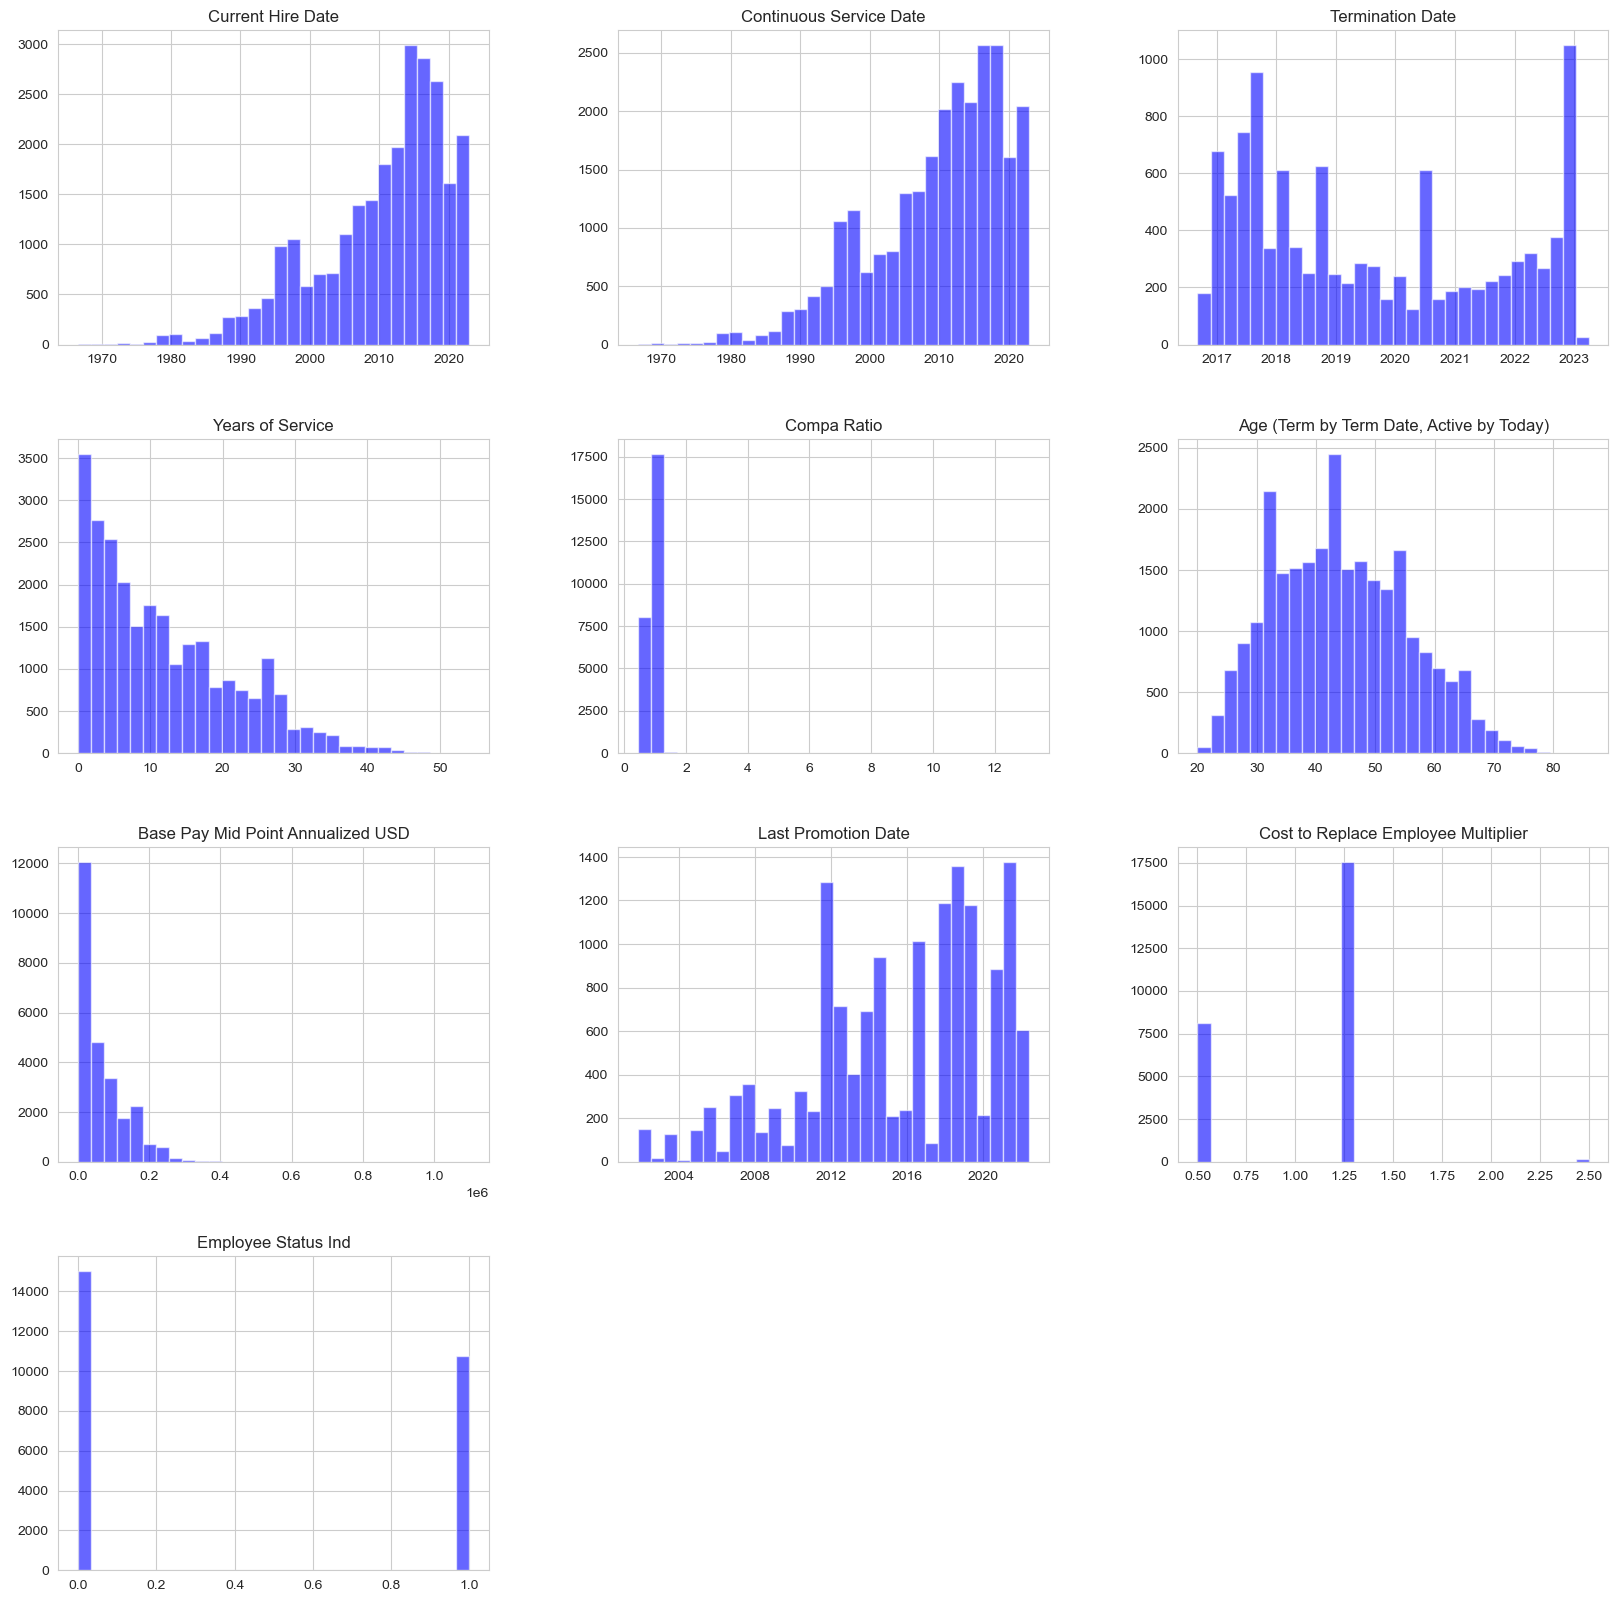

In [40]:
employee_df.hist(bins=30, figsize=(20,20), color='b', alpha=0.6 )

# seaborn to plot Churn percentage

In [44]:
employee_df["Employee Status"].value_counts(["Terminated"])

Active          0.581184
Terminated      0.417420
Unpaid Leave    0.001396
Name: Employee Status, dtype: float64

# Percentage of termination is very high at 41%

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

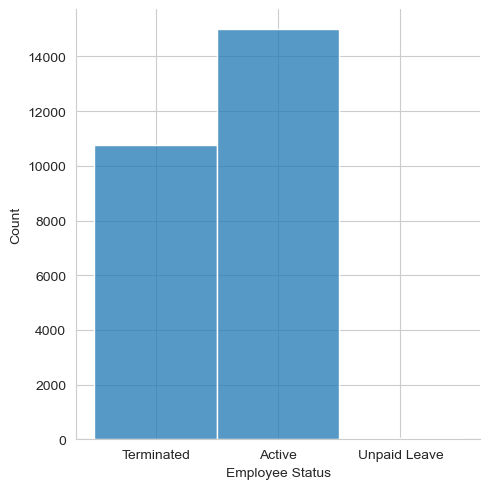

In [47]:
sns.displot(data = employee_df, x = "Employee Status")

# EDA analysis on target variables

In [52]:
#Age 

employee_df.rename(columns={'Age (Term by Term Date, Active by Today)': 'Age'}, inplace=True)


<AxesSubplot:xlabel='Age', ylabel='Count'>

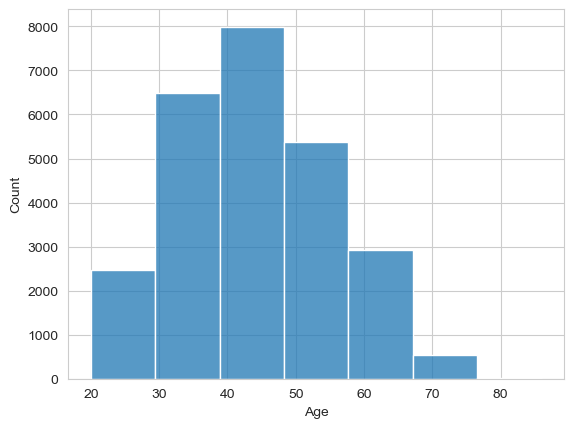

In [53]:
plt.figure()
sns.histplot(data = employee_df, x = "Age", bins = 7)

# Minimum and Maximum age of the workforce is 18 and 70 years respectively.

<AxesSubplot:xlabel='Age', ylabel='Count'>

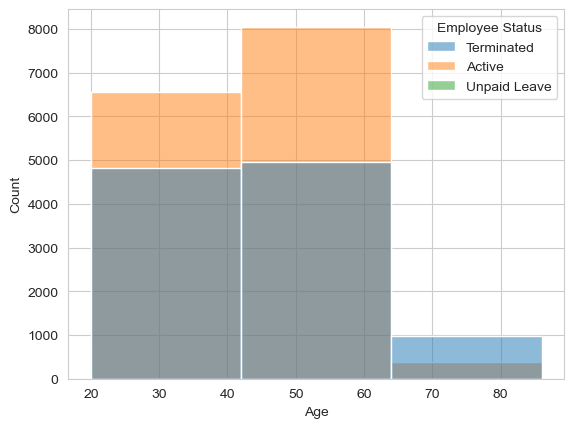

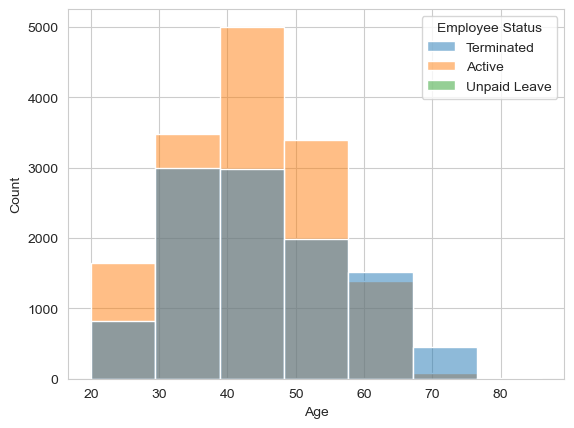

In [54]:
plt.figure()
sns.histplot(data = employee_df, x = "Age", bins = 3, hue = "Employee Status")
plt.figure()
sns.histplot(data = employee_df, x = "Age", bins = 7, hue = "Employee Status")

# Observation: From the histplot (where bins = 3), we can infer that absolute (more than 100 employees) and percentage values (around 33%) of employees are resigning whose age is less than 32. If this percentage value (around 33%) is greater than the industry average then this should be a cause of worry and the top-level management should try to bring this down by retaining the workforce.

In [55]:
(mu, sigma) = norm.fit(employee_df.loc[employee_df["Employee Status"] == 'Terminated', 'Age'])

print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

Ex-exmployees: average age = 45.1 years old and standard deviation = 12.0


In [56]:
(mu, sigma) = norm.fit(employee_df.loc[employee_df['Employee Status'] == 'Active', 'Age'])

print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Current exmployees: average age = 43.3 years old and standard deviation = 10.5


# Let's create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It will allow us to identify if there is a correlation between the Age of the Client and their ability to pay it back.

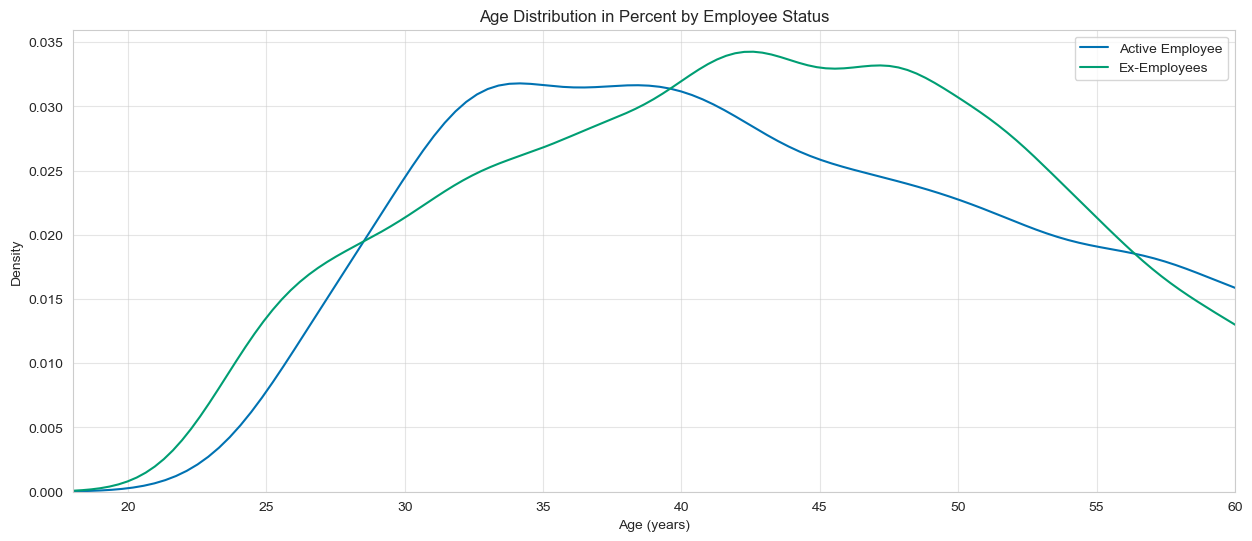

In [57]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(employee_df.loc[employee_df['Employee Status'] == 'Terminated', 'Age'], label = 'Active Employee')
sns.kdeplot(employee_df.loc[employee_df['Employee Status'] == 'Active', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Employee Status');

#Ex-Employees has average of around 40 years, Active Employee has an average of around 33. Older employees is more likely to leave the company, years of experience, job function, education, martial status are potential support.

# Analyze which department has more Churn. 

In [58]:
employee_df['Job Function'].value_counts()

Engineering                         10481
Manufacturing                        6097
Engineering Services                 1886
Information Technology               1728
Materials                            1115
Finance/Accounting                    872
Operations Support                    688
Sales                                 518
Human Resources                       475
Marketing                             437
Sales Operations                      404
Administrative                        337
Quality                               272
Customer Service                      246
Legal                                 125
PR/Communications                      49
Business Excellence                    17
Section 16 Officer                     10
Professional Services                   8
Business Operations                     6
Product Line Management                 3
General Management                      3
Corp Dev                                2
Customer Support                  

In [118]:
#conda install -c conda-forge cufflinks-py 


In [59]:
employee_df['Job Function'].shape[0]

25787

In [60]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode

import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

df_JobFunction = pd.DataFrame(columns=["Field", "% of Leavers"])

i=0

for field in list(employee_df['Job Function'].unique()):
    ratio = employee_df[(employee_df['Job Function']==field)&(employee_df["Employee Status"] == 'Terminated')].shape[0] / employee_df['Job Function'].shape[0]
    df_JobFunction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

df_EF = df_JobFunction.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Churn by Job Function Field (%)')


Engineering has highest churn overall. Followed by IT, Manufacturing, Financial Accounting, Engineering Services. 

# Correlation


In [64]:
# Find correlations with the target and sort
correlations = employee_df.corr()['Employee Status Ind'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(3))
print('\nMost Negative Correlations: \n', correlations.head(2))

Most Positive Correlations: 
 Age                                    0.075063
Cost to Replace Employee Multiplier    0.082434
Employee Status Ind                    1.000000
Name: Employee Status Ind, dtype: float64

Most Negative Correlations: 
 Years of Service   -0.160459
Compa Ratio        -0.096755
Name: Employee Status Ind, dtype: float64


<AxesSubplot:>

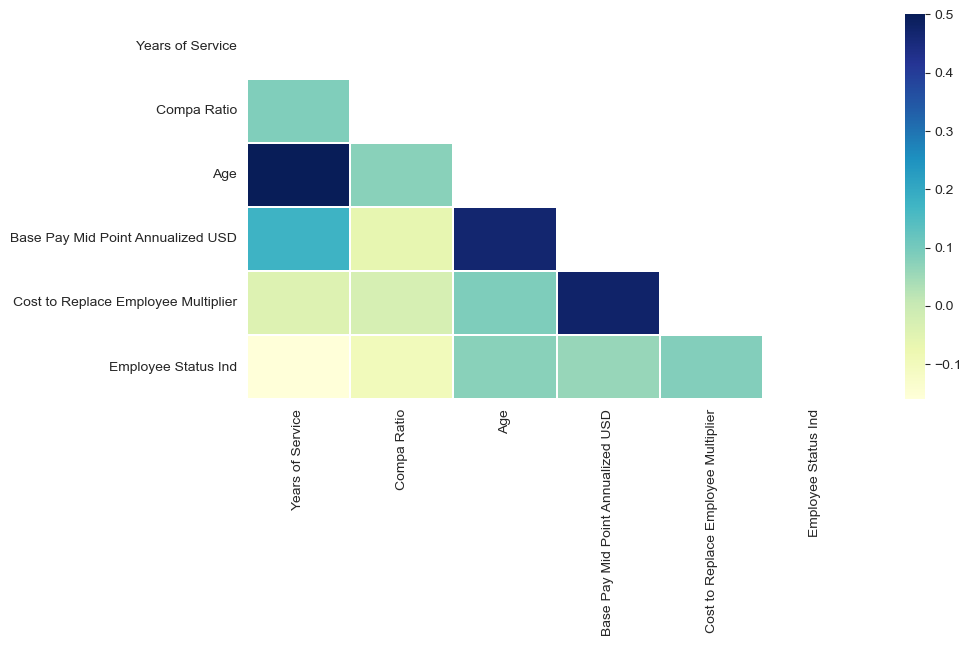

In [66]:
corr = employee_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

# Pre-processing Pipeline


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [71]:
# Label Encoding will be used for columns with 2 or less unique values
df_employee_cleaned = employee_df.copy()

le_count = 0
for col in df_employee_cleaned.columns[1:]:
    if df_employee_cleaned[col].dtype == 'object':
        if len(list(df_employee_cleaned[col].unique())) <= 2:
            le.fit(df_employee_cleaned[col])
            df_employee_cleaned[col] = le.transform(df_employee_cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [72]:
df_employee_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25787 entries, 0 to 25786
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Employee Status                      25787 non-null  object        
 1   Employee Type                        25787 non-null  int32         
 2   Current Hire Date                    25787 non-null  datetime64[ns]
 3   Continuous Service Date              25787 non-null  datetime64[ns]
 4   Termination Date                     10951 non-null  datetime64[ns]
 5   Years of Service                     25787 non-null  float64       
 6   Term Category                        10950 non-null  object        
 7   Termination Reason                   10950 non-null  object        
 8   Location                             25787 non-null  object        
 9   Country                              25787 non-null  object        
 10  Region    

# WIP

In [73]:
# convert rest of categorical variable into dummy

df_employee_cleaned = pd.get_dummies(df_employee_cleaned, drop_first=True)

In [75]:
df_employee_cleaned.head()

,Employee Type,Current Hire Date,Continuous Service Date,Termination Date,Years of Service,Compa Ratio,Age,Base Pay Mid Point Annualized USD,Last Promotion Date,Cost to Replace Employee Multiplier,...,Race/Ethnicity_Pakistani,Race/Ethnicity_Sarawakian,Race/Ethnicity_Sikh,Race/Ethnicity_Thai,"Race/Ethnicity_Two or More Races, not Hispanic or Latino","Race/Ethnicity_White, not Hispanic or Latino",Race/Ethnicity_others,Gender_Male,Gender_Undeclared,Gender_Unknown
0,1,1991-04-29,1991-04-29,2020-08-04,29.3,0.841,59.0,250036.80,2003-09-22,1.25,...,0,0,0,0,0,1,0,1,0,0
1,1,1993-07-01,1993-07-01,2018-07-11,25.0,1.017,54.0,203097.98,2010-07-01,1.25,...,0,0,0,0,0,0,0,1,0,0
2,1,1989-07-05,1989-07-05,2017-09-22,28.2,0.890,58.0,50178.00,NaT,1.25,...,0,0,0,0,0,0,0,0,0,0
3,1,1984-02-15,1984-02-15,NaT,38.8,1.070,56.0,56514.22,NaT,1.25,...,0,0,0,0,0,0,0,0,0,0
4,1,1987-04-22,1987-04-22,2018-09-14,31.4,0.788,64.0,92718.64,2011-07-01,1.25,...,0,0,0,0,0,0,0,0,0,0
